In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('/home/student24/Coop_Projects/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
# Check for missing values
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


1. General Analytics

Now that we have successfully loaded the dataset, we confirmed there are no missing or duplicate values, ensuring data quality. Before diving into deeper analyses, we will start with some general analytics to understand the overall distribution and spread of the data, providing a foundation for further exploration.


In [4]:

# Check for duplicates
df.duplicated().sum()



#Customer Age Distribution

df['CustomerAge'].mean()


44.673964968152866

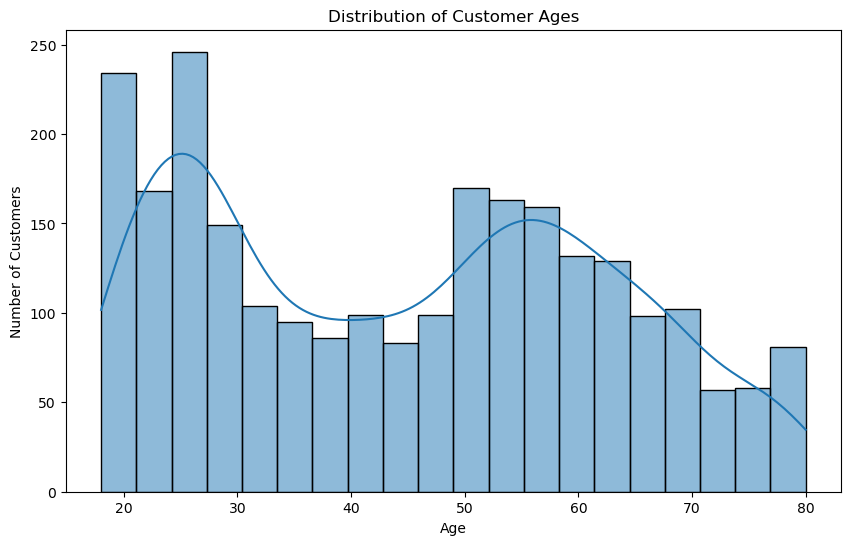

In [5]:
# Show the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=20, kde=True) 
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


The dataset showcases a wide age range among customers, providing valuable insights into user demographics:

Youngest Customer: 18 years old.

Oldest Customer: 80 years old.

Average Age: 44.7 years.

This broad age spectrum reflects a diverse customer base, allowing us to analyze transaction patterns and potential fraud behaviors across different age groups. Understanding this distribution helps tailor fraud detection mechanisms to varying customer profiles.

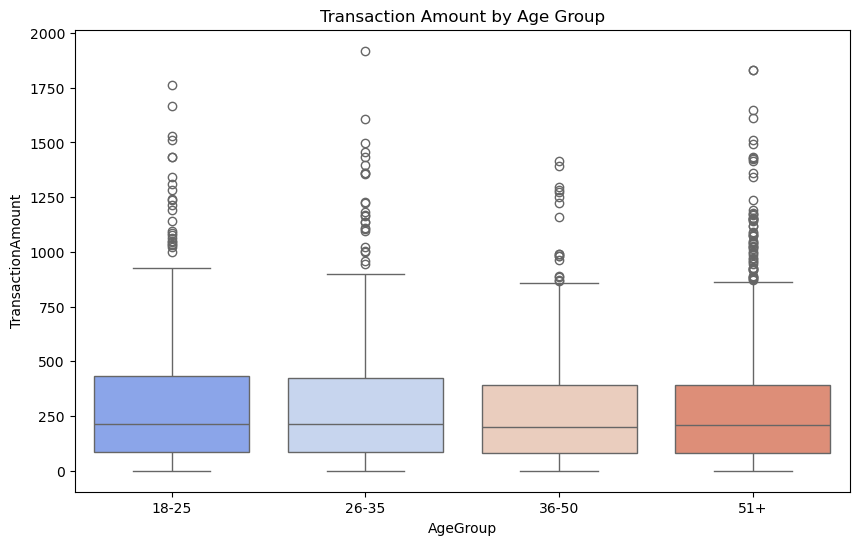

In [6]:
# Transaction Amount by Age Group¶

df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '51+'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='TransactionAmount', palette='coolwarm')
plt.title("Transaction Amount by Age Group")
plt.show()



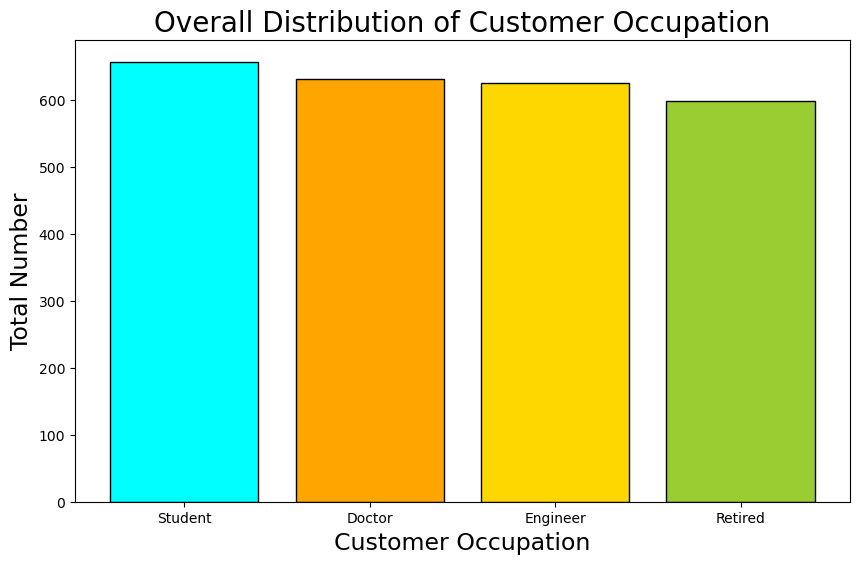

In [7]:
# Overall Distribution of Customer Occupation¶

customer_occupation_counts = df['CustomerOccupation'].value_counts()
customer_occupation_counts

plt.figure(figsize=(10,6))

colors=['aqua', 'orange', 'gold', 'yellowgreen']

plt.bar(customer_occupation_counts.index, customer_occupation_counts.values, color=colors[:len(customer_occupation_counts)], edgecolor='black')

plt.xlabel('Customer Occupation', fontsize=17)
plt.ylabel('Total Number', fontsize=17)

plt.title('Overall Distribution of Customer Occupation', fontsize=20)

plt.show()



This dataset captures the occupations of customers, categorized into four groups: students, doctors, engineers, and retired individuals. Upon analysis, we found that these groups are almost equally distributed, indicating no significant bias toward any single occupation category.

This balanced distribution provides a good representation of varied customer profiles, allowing us to analyze transaction patterns and behaviors across diverse professional backgrounds effectively.

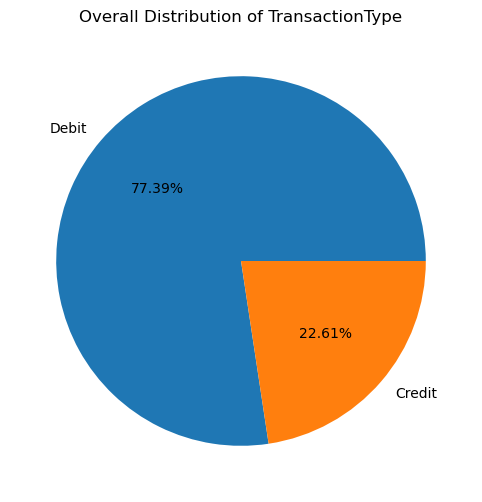

In [8]:
# Overall Distribution of Transaction Type¶

debitcard_counts = df[df['TransactionType']=='Debit']['TransactionType'].count()
creditcard_counts = df[df['TransactionType']=='Credit']['TransactionType'].count()

plt.figure(figsize=(10,6))

index_values = [debitcard_counts, creditcard_counts]
index_labels = ['Debit', 'Credit']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of TransactionType')

plt.show()

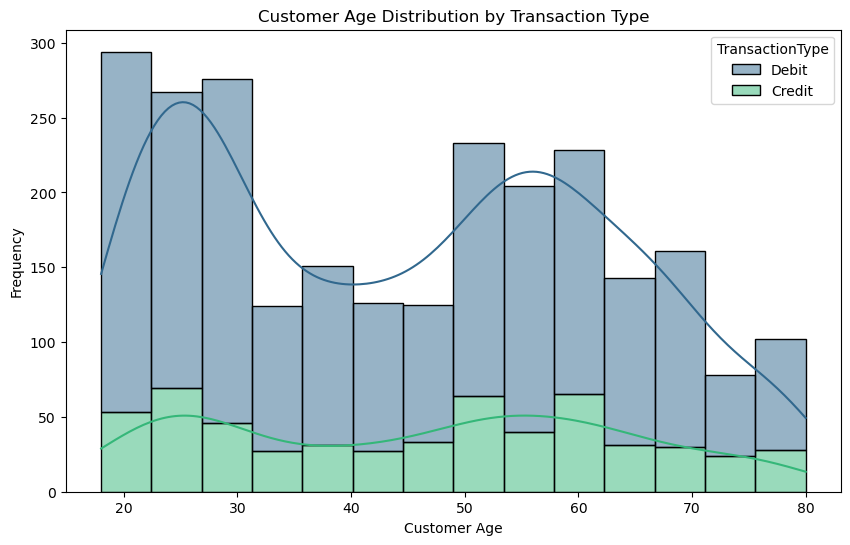

In [9]:
# Customer Age Distribution by Transaction Type¶

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='viridis', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


Customer Age Distribution by Transaction Type:

    Age Group Activity:

        Young adults (20-30) are the most active, preferring debit transactions.

        Middle-aged customers (50-60) show steady transaction volumes.

        Seniors (70+) are the least active but maintain a similar debit-to-credit ratio.

    Transaction Type Patterns:

        Debit transactions (blue) are most common across all age groups.

        Credit transactions (green) remain consistent across all groups.

        The debit-to-credit ratio is highest among younger customers (20-30), showing a stronger reliance on debit.

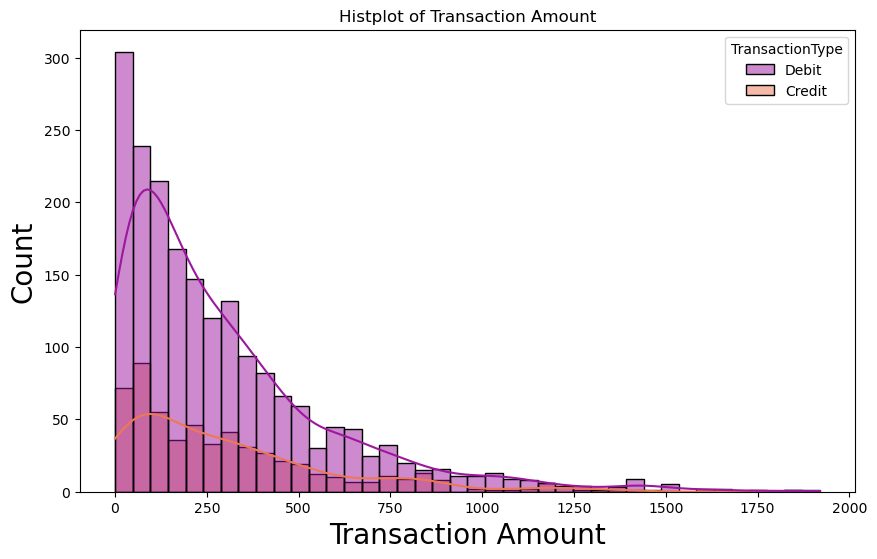

In [10]:
# Histplot of Transaction Amount¶

plt.figure(figsize=(10,6))

plt.xlabel("Transaction Amount", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.title("Histplot of Transaction Amount")

sns.histplot(data=df, x="TransactionAmount", kde=True, hue='TransactionType', palette='plasma')

plt.show()



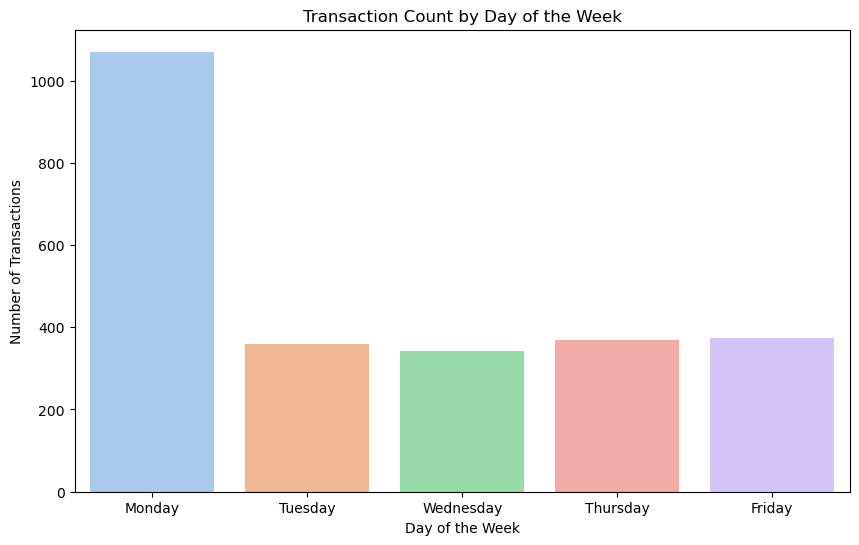

In [11]:
# Transaction Count by Day of the Week¶

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract the day of the week
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

# Plot transaction count by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], palette='pastel')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()



Most transactions are concentrated on Monday, significantly outpacing other weekdays. The transaction count drops and stabilizes across Tuesday to Friday, showing a consistent pattern during the rest of the week. The spike on Mondays might be linked to weekend carryovers or recurring bill payments typically scheduled after the weekend. This makes Monday transactions crucial for fraud monitoring.

# Correlation Heatmap for Numeric Columns

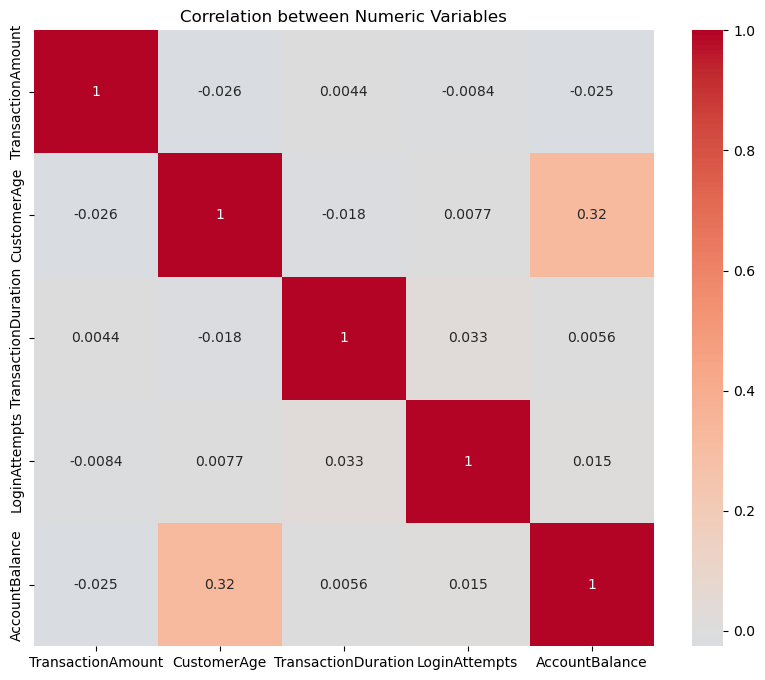

In [12]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numeric Variables')
plt.show()

In [13]:
# World Map Transaction Visualisation

import folium
from geopy.geocoders import Nominatim



In [14]:
# Calculate the approximate latitude/ longitude coordinates for unique locations in the data
unique_locations = df['Location'].unique()
location_coords = {}

# Initialize geolocator
geolocator = Nominatim(user_agent="location_mapper")

# Get approximate coordinates for each unique location
for location in unique_locations:
    try:
        loc = geolocator.geocode(location)
        if loc:
            location_coords[location] = (loc.latitude, loc.longitude)
        else:
            print(f"Coordinates not found for {location}")
    except Exception as e:
        print(f"Error fetching coordinates for {location} : {e}")

# Add the coordinates to the DataFrame
df['Coordinates'] = df['Location'].map(location_coords)


In [15]:


# Iniitialize the Folium map centered at an approximate central point
initial_coords = list(location_coords.values())[0] if location_coords else [0, 0]
mymap = folium.Map(location = initial_coords, zoom_start=5)

for _, row in df.iterrows():
    if row['Coordinates']:
        folium.Marker(
            location=row['Coordinates'],
            popup=f"TransactionID: {row['TransactionID']}<br>Amount: ${row['TransactionAmount']}",
            tooltip=row['Location']
        ).add_to(mymap)






2. Clustering for Fraud Detection¶

Our dataset lacked a target column, meaning we didn’t have labeled data to identify whether a transaction was fraudulent or not. In such cases, supervised machine learning methods cannot be applied. Instead, we turned to unsupervised machine learning algorithms, which are designed to work with unlabeled data. These methods allow the model to uncover naturally occurring patterns or groupings within the dataset. By leveraging clustering algorithms, we were able to identify potential anomalies and suspicious activities without relying on predefined labels. This approach is particularly useful for fraud detection, where suspicious behavior often stands out in the data.


To detect potential fraudulent transactions, we calculated the distance of each transaction from its assigned cluster centroid. Transactions in the top 5% of distances (farthest from their respective centroids) were flagged as potential frauds.


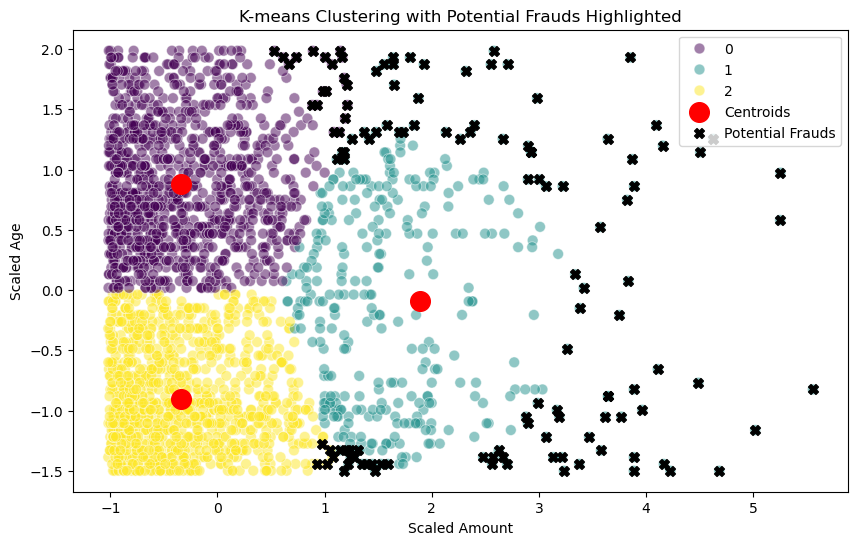

Number of potential frauds detected: 126


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['TransactionAmount', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

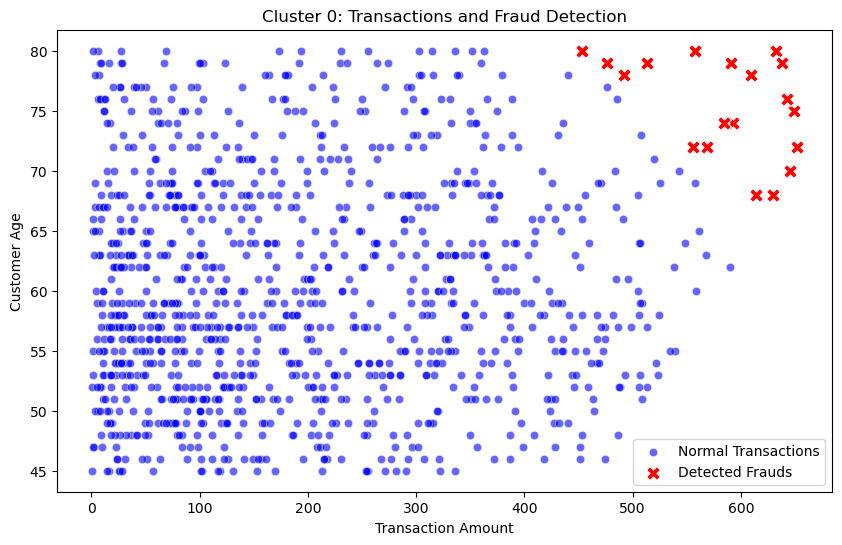

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Cluster 0
cluster_0_data = df[df['KMeans_Cluster'] == 0]
fraud_data_cluster_0 = cluster_0_data[cluster_0_data['Potential_Fraud'] == True]

# Scatter plot with frauds highlighted in Cluster 0
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_0_data, x='TransactionAmount', y='CustomerAge', color='blue', label='Normal Transactions', alpha=0.6)
sns.scatterplot(data=fraud_data_cluster_0, x='TransactionAmount', y='CustomerAge', color='red', label='Detected Frauds', s=100, marker='X')
plt.title('Cluster 0: Transactions and Fraud Detection')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.legend()
plt.show()